In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
print(df_train.shape)

(1460, 81)


In [7]:
df_train.iloc[:, :20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950


In [8]:
# check for duplications
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

#drop id col
df_train.drop(['Id'], axis =1, inplace=True)

0


## Exploring the Target Variable

The goal of this competition was to predict the price of a house. These values are stored in the variable `SalePrice`.

In [9]:
# descriptive statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

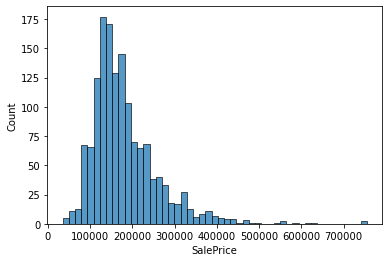

In [10]:
# histogram
sns.histplot(df_train['SalePrice'])

## Relationship Between the Target Variable and Predictors

In [11]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

## Numerical Variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

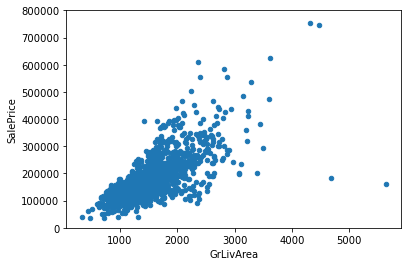

In [12]:
# scatter plot grlivarea vs. SalePrice
var = 'GrLivArea'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

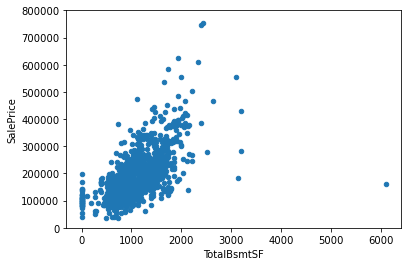

In [13]:
var = 'TotalBsmtSF'
data = df_train[['SalePrice', var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

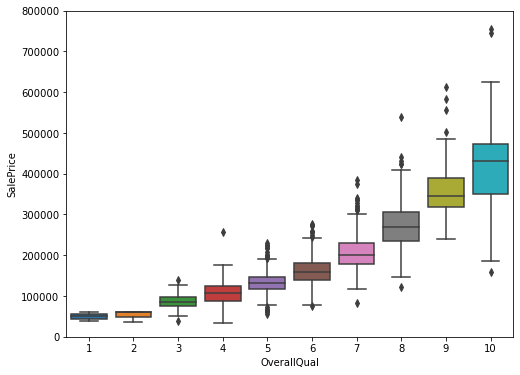

In [14]:
var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

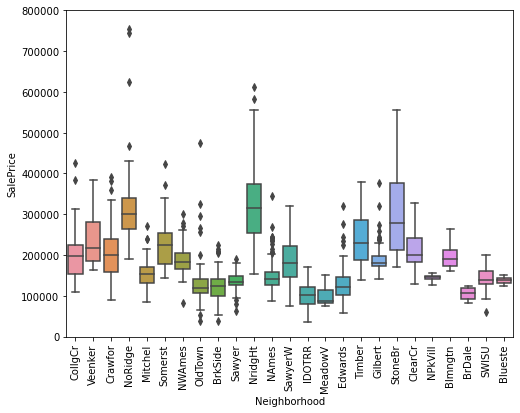

In [15]:
var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

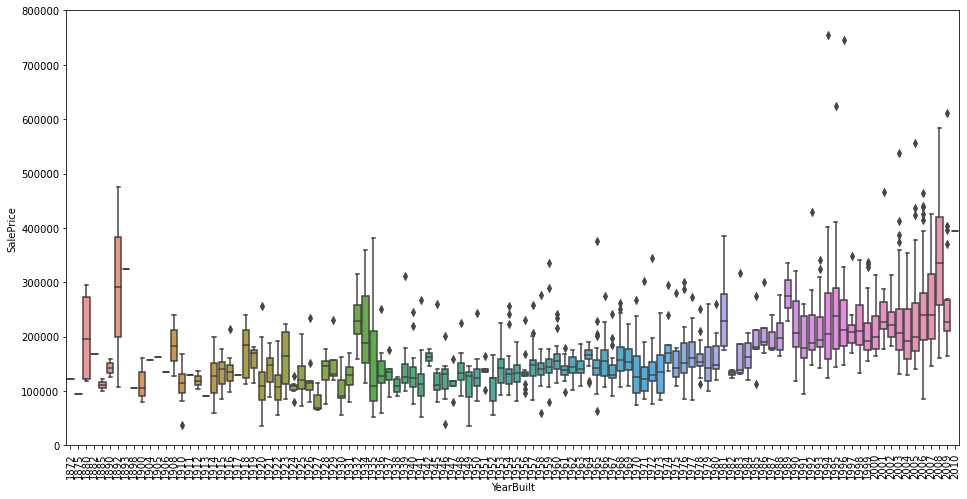

In [16]:
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

## Multivariate Analysis

Correlation Matric between numeric attributes.

<AxesSubplot:>

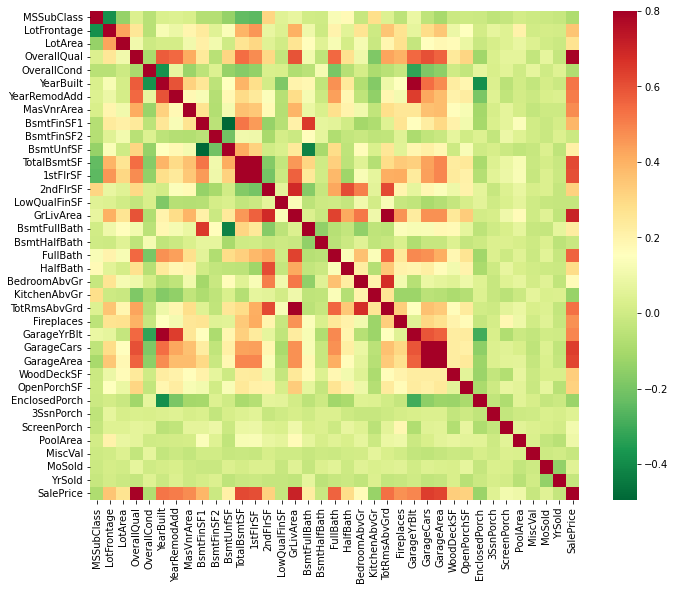

In [17]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

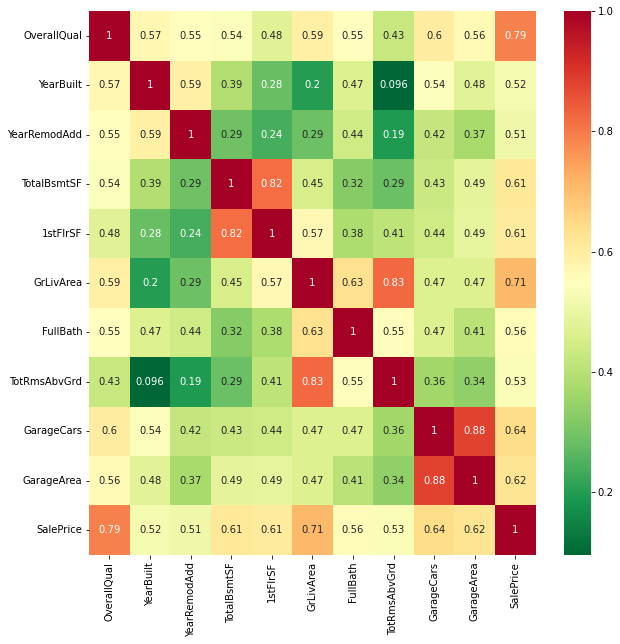

In [18]:
# most correlated features with SalePrice
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

## Outlier Detection

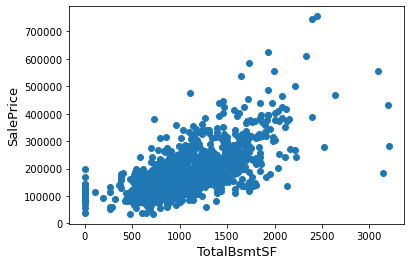

In [19]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

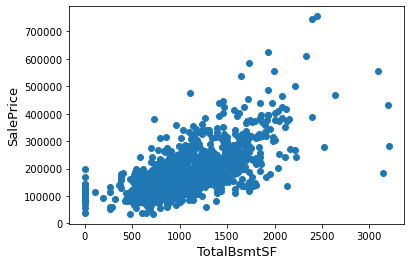

In [20]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

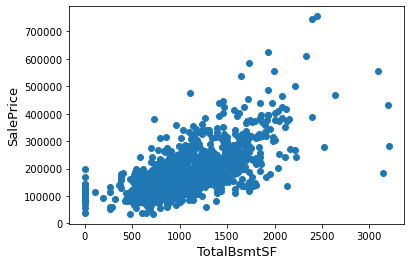

In [21]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

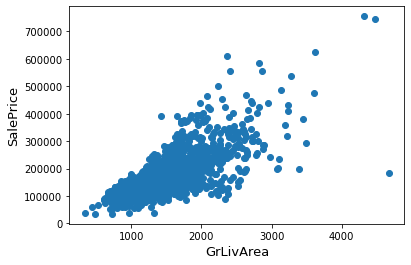

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

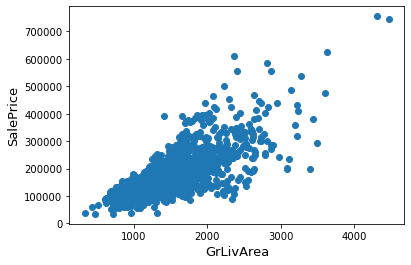

In [23]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Null Value Replacement

In [24]:
df_train.isnull().count()

MSSubClass       1458
MSZoning         1458
LotFrontage      1458
LotArea          1458
Street           1458
                 ... 
MoSold           1458
YrSold           1458
SaleType         1458
SaleCondition    1458
SalePrice        1458
Length: 80, dtype: int64

In [25]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
GarageCond,81,0.055556
GarageType,81,0.055556
GarageFinish,81,0.055556


In [26]:
missing_data.head(5).index.to_list()

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [27]:
# drop 5 columns with the biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [28]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

GarageCond       object
GarageYrBlt     float64
BsmtFinType2     object
MasVnrType       object
Electrical       object
GarageType       object
GarageQual       object
BsmtFinType1     object
BsmtQual         object
BsmtCond         object
MasVnrArea      float64
LotFrontage     float64
BsmtExposure     object
GarageFinish     object
dtype: object

## Numeric Variables

In [29]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
num_cols_with_missing

['GarageYrBlt', 'MasVnrArea', 'LotFrontage']

In [30]:
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

In [31]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

## Object (String) Variables

In [32]:
# 2. for categorical variables:
missing_objects = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
missing_objects

GarageCond      object
BsmtFinType2    object
MasVnrType      object
Electrical      object
GarageType      object
GarageQual      object
BsmtFinType1    object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
GarageFinish    object
dtype: object

In [33]:
cat_cols_with_missing = missing_objects.index.tolist()

With the help o the data documentation we have, we can figure out that the missing values in `Garage` and `Basement` variabels mean no garage and no basement respectively. Therefore, we will replace the missing values with `None`.

In [34]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

The information about `Electrical` and `MasVnrType` is missing in the documentation. Since we are dealing with categorical variabels , we will create a new category for a missing value.

In [35]:
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

Finally, we can run the missing values check once more to see if we have filled in all the data.

In [36]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_missing_ind,MasVnrArea_missing_ind,LotFrontage_missing_ind
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,0,0,0
1454,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,0,0,0
1455,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,0,0,0
1456,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,0,0,0


In [37]:
df_train.isnull().sum()

MSSubClass                 0
MSZoning                   0
LotFrontage                0
LotArea                    0
Street                     0
                          ..
SaleCondition              0
SalePrice                  0
GarageYrBlt_missing_ind    0
MasVnrArea_missing_ind     0
LotFrontage_missing_ind    0
Length: 78, dtype: int64

## Value Transformation

In [38]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

### Numeric Variables

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

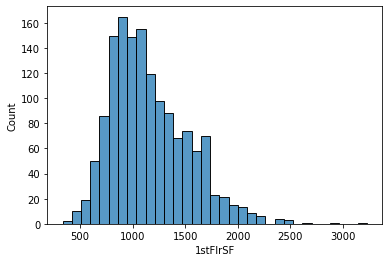

In [39]:
sns.histplot(df_train["1stFlrSF"])

<AxesSubplot:xlabel='1stFlrSF_log', ylabel='Count'>

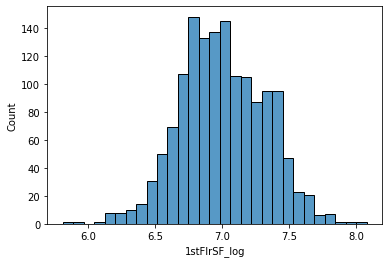

In [40]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.histplot(df_train["1stFlrSF_log"])

In [41]:
# Scaling
from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+["1stFlrSF_log"]].astype(float)))

In [42]:
print(df_train_scaled.columns)

RangeIndex(start=0, stop=41, step=1)


In [43]:
df_train_scaled.columns = num_feats+["1stFlrSF_log"]
print(df_train_scaled.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'GarageYrBlt_missing_ind',
       'MasVnrArea_missing_ind', 'LotFrontage_missing_ind', '1stFlrSF_log'],
      dtype='object')


### String Variables

In [44]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [45]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

## Feature Engineering

In [46]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']

<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

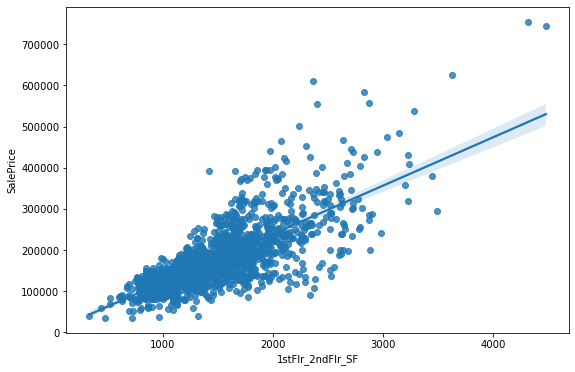

In [47]:
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(
    x = (df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

In [48]:
# overall quality of a house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_missing_ind,MasVnrArea_missing_ind,LotFrontage_missing_ind,1stFlrSF_log,1stFlr_2ndFlr_SF,OverallGrade
0,60,RL,65.0,8450,2,4,Lvl,4,Inside,3,...,2008,WD,Normal,208500,0,0,0,6.752270,1710,35
1,20,RL,80.0,9600,2,4,Lvl,4,FR2,3,...,2007,WD,Normal,181500,0,0,0,7.140453,1262,48
2,60,RL,68.0,11250,2,3,Lvl,4,Inside,3,...,2008,WD,Normal,223500,0,0,0,6.824374,1786,35
3,70,RL,60.0,9550,2,3,Lvl,4,Corner,3,...,2006,WD,Abnorml,140000,0,0,0,6.867974,1717,35
4,60,RL,84.0,14260,2,3,Lvl,4,FR2,3,...,2008,WD,Normal,250000,0,0,0,7.043160,2198,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,62.0,7917,2,4,Lvl,4,Inside,3,...,2007,WD,Normal,175000,0,0,0,6.859615,1647,30
1454,20,RL,85.0,13175,2,4,Lvl,4,Inside,3,...,2010,WD,Normal,210000,0,0,0,7.636752,2073,36
1455,70,RL,66.0,9042,2,4,Lvl,4,Inside,3,...,2010,WD,Normal,266500,0,0,0,7.080026,2340,63
1456,20,RL,68.0,9717,2,4,Lvl,4,Inside,3,...,2010,WD,Normal,142125,0,0,0,6.982863,1078,30


(-0.5, 5.5, 0.0, 800000.0)

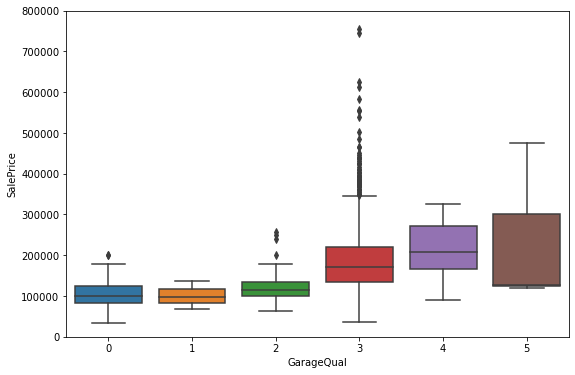

In [49]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [50]:
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

(-0.5, 2.5, 0.0, 800000.0)

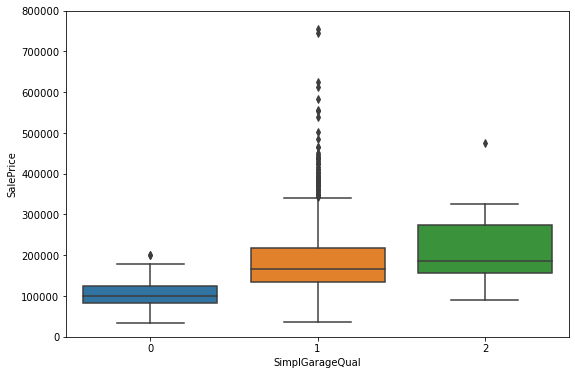

In [51]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [62]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]
df_numeric.shape

(1458, 60)

In [63]:
y = df_numeric.SalePrice
df_numeric.drop("SalePrice", axis=1, inplace=True)

<ipython-input-63-6c79ec388ae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop("SalePrice", axis=1, inplace=True)


In [64]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_transformed = vt.fit_transform(df_numeric)

In [65]:
df_transformed.shape

(1458, 50)

In [66]:
# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = df_numeric.columns[vt.get_support()]
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotFrontage_missing_ind', '1stFlr_2ndFlr_SF',
       'OverallGrade'],
      dtype='object')

In [67]:
# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

## Part 2: Removing Correlated Features

The goal of this part is to remove one feature from each highly correlated pair. We are going to do this in 3 steps:
1. Calculate a correlation matrix
2. Get pairs of highly correlated features
3. Remove correlated columns

In [68]:
# step 1
df_corr = df_transformed.corr().abs()

# step 2
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [69]:
print(indices)

[('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', '1stFlr_2ndFlr_SF'), ('TotRmsAbvGrd', '1stFlr_2ndFlr_SF'), ('GarageCars', 'GarageArea'), ('GarageQual', 'GarageCond')]


## Part 3: Forward Regression

We have removed the features with **np information** and **correlated features** so far. The last thing we will do before modeling is to select the k-best features in terms of the relationship with the `target` variable.

In [73]:
from sklearn.feature_selection import f_regression, SelectKBest

skb = SelectKBest(f_regression, k=10)
X = skb.fit_transform(df_transformed, y)

In [74]:
# this will give us the position of top 10 columns
skb.get_support()

# column names
df_transformed.columns[skb.get_support()]
X = pd.DataFrame(X,columns=df_transformed.columns[skb.get_support()])

In [75]:
X

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade
0,7.0,2003.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0
1,6.0,1976.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0
2,7.0,2001.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0
3,7.0,1915.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0
4,8.0,2000.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0
...,...,...,...,...,...,...,...,...,...,...
1453,6.0,1999.0,3.0,4.0,953.0,1647.0,2.0,3.0,2.0,30.0
1454,6.0,1978.0,3.0,4.0,1542.0,2073.0,2.0,3.0,2.0,36.0
1455,7.0,1941.0,5.0,3.0,1152.0,2340.0,2.0,4.0,1.0,63.0
1456,5.0,1950.0,3.0,3.0,1078.0,1078.0,1.0,4.0,1.0,30.0


## Predicting House Prices with Linear Regression

We will fit **linear regression** to this and explore if all these attributes are significant. There are two main interpretations of linear regression in Python:
- statsmodels
- sklearn


### Using statsmodels

In [76]:
import statsmodels.api as sm

In [77]:
X = sm.add_constant(X) # adding a constant

In [79]:
# OLS is Ordinary Least Squares
lin_reg = sm.OLS(y,X)

In [81]:
type(lin_reg)

statsmodels.regression.linear_model.OLS

In [82]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     732.0
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:22:13   Log-Likelihood:                -17206.
No. Observations:                1458   AIC:                         3.443e+04
Df Residuals:                    1447   BIC:                         3.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.992e+05   8.93e+04    -10.069   

### Using sklearn

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [85]:
print(regressor.coef_)

[     0.           5507.54189138    392.2863556   14466.78601472
    920.78618122     42.13854481     66.85496149 -11218.59562134
  11469.89475761   9314.43585305   1078.19597724]


The above are *beta coefficients*. They are ordered the same as our columns in `X`. The first one is 0 because we have added a constant column using `statsmodel` modeling. Tis column doesn't have any meaning in `sklearn` so we could have dropped that before.

The `statsmodel` provides a more complete and organized view of the results. Note that the *p-values* are missing.

To view the R-squared value:

In [86]:
regressor.score(X,y)

0.8349492071391901

The advantage of the `sklearn` implementation is that it is consistent with all other methods and models in this library.